In [1]:
!jt -t onedork -T -N -kl

In [2]:
!jt -t onedork -N -kl

In this notebook,we use the information provided in "Introduction to Statistical Learning with Applications in R" by Gareth James.

# Ridge Regression
*Víctor Acevedo*

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import mean_squared_error

In [7]:
df_hitters = pd.read_csv("datasets/RegularizedReg/Hitters.csv").dropna()
df_hitters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 8 columns):
AtBat      263 non-null int64
Hits       263 non-null int64
Walks      263 non-null int64
Assists    263 non-null int64
CAtBat     263 non-null int64
Runs       263 non-null int64
Errors     263 non-null int64
Salary     263 non-null float64
dtypes: float64(1), int64(7)
memory usage: 18.5 KB


In [8]:
df_hitters.head()

,AtBat,Hits,Walks,Assists,CAtBat,Runs,Errors,Salary
1,315,81,39,43,3449,24,10,475.0
2,479,130,76,82,1624,66,14,480.0
3,496,141,37,11,5628,65,3,500.0
4,321,87,30,40,396,39,4,91.5
5,594,169,35,421,4408,74,25,750.0


In [9]:
y = df_hitters.Salary
X = df_hitters.drop(['Salary'], axis = 1).astype('float64')

X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 7 columns):
AtBat      263 non-null float64
Hits       263 non-null float64
Walks      263 non-null float64
Assists    263 non-null float64
CAtBat     263 non-null float64
Runs       263 non-null float64
Errors     263 non-null float64
dtypes: float64(7)
memory usage: 16.4 KB


In [10]:
# Split data into training and test sets
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

In [11]:
alphas = np.linspace(0.01,1,100)
alphas

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [12]:
mse = []
coeficientes = []
for hiper in alphas:
    ridge = Ridge(alpha = hiper, normalize = True)
    ridge.fit(X_train, y_train)
    
    coeficientes.append(ridge.coef_)
    mse.append(mean_squared_error(y_test, ridge.predict(X_test)))

coeficientes = list(map(list, zip(*coeficientes)))   
df_mse = pd.DataFrame(mse, columns=['mse'])
df_alpha = pd.DataFrame(alphas, columns=['alpha'])

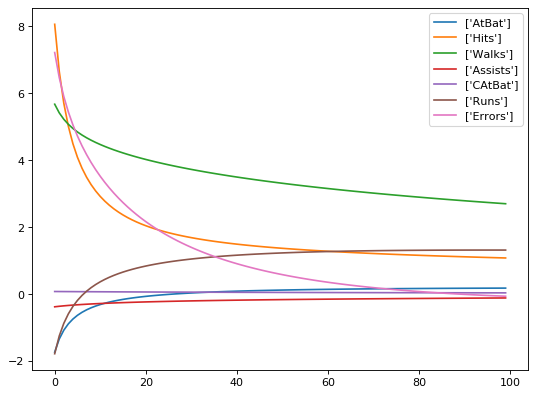

In [13]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
for coef,varaible in zip(range(len(coeficientes)), X_train.columns):
    plt.plot(coeficientes[coef], label=[varaible])
plt.legend()

In [14]:
df_alpha_mse = df_alpha.merge(df_mse,left_index=True, right_index=True)

In [15]:
df_alpha_mse.where(df_alpha_mse['mse'] == min(df_alpha_mse['mse'])).dropna()

,alpha,mse
3,0.04,99452.373195


In [16]:
opt_info = df_alpha_mse.where(df_alpha_mse['mse'] == min(df_alpha_mse['mse'])).dropna()

In [17]:
opt_alpha = opt_info.loc[:,'alpha'].values
opt_alpha

array([0.04])

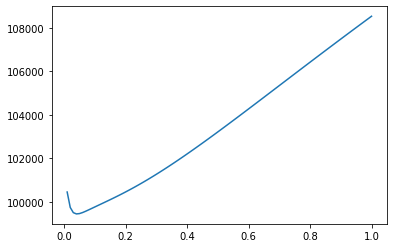

In [18]:
plt.plot(df_alpha_mse.alpha,df_alpha_mse.mse)

In [19]:
ridge = Ridge(alpha = opt_alpha, normalize = True)
ridge.fit(X_train, y_train)
    
ridge.coef_

array([-0.88068239,  5.01772738,  5.07726389, -0.33171881,  0.08181174,
       -0.5825466 ,  5.44517505])

In [20]:
    mco = Ridge(alpha = 0, normalize = True)
    mco.fit(X_train, y_train)
    mean_squared_error(y_test, mco.predict(X_test))

102581.89090249145

In [21]:
# lrm =linear_model.LinearRegression()
# lrm.fit(X_train,y_train)
# mean_squared_error(y_test, lrm.predict(X_test))

# LASSO

In [22]:
l1_mse = []
l1_coeficientes = []
for hiper in alphas:
    lasso = Lasso(alpha = hiper, normalize = True)
    lasso.fit(X_train, y_train)
    
    l1_coeficientes.append(lasso.coef_)
    l1_mse.append(mean_squared_error(y_test, lasso.predict(X_test)))

l1_coeficientes = list(map(list, zip(*l1_coeficientes)))   
df_mse_l1 = pd.DataFrame(l1_mse, columns=['mse'])
df_alpha = pd.DataFrame(alphas, columns=['alpha'])

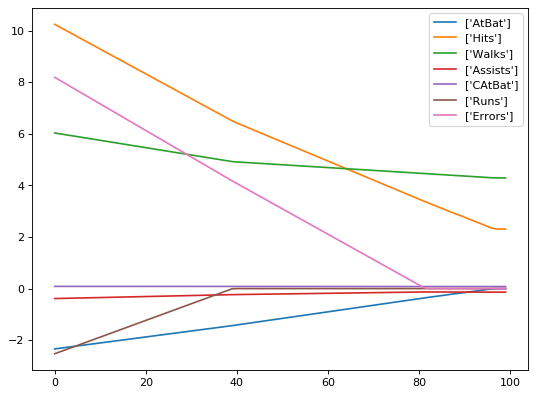

In [23]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
for coef,varaible in zip(range(len(l1_coeficientes)), X_train.columns):
    plt.plot(l1_coeficientes[coef], label=[varaible])
plt.legend()

In [24]:
df_alpha_mse_l1 = df_alpha.merge(df_mse_l1,left_index=True, right_index=True)
df_alpha_mse_l1.where(df_alpha_mse_l1['mse'] == min(df_alpha_mse_l1['mse'])).dropna()

,alpha,mse
59,0.6,97337.569916
